In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Aesthetic configuration for seaborn and matplotlib
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='darkgrid', palette='rocket')

In [5]:
df = pd.read_csv('student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.shape

(395, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


Deskripsi tiap kolom variabel

sekolah - sekolah siswa (biner: 'GP' - Gabriel Pereira atau 'MS' - Mousinho da Silveira)

seks - jenis kelamin siswa (biner: 'F' - perempuan atau 'M' - laki-laki)

usia - usia siswa (numerik: dari 15 hingga 22)

alamat - jenis alamat rumah siswa (biner: 'U' - perkotaan atau 'R' - pedesaan)

famsize - ukuran keluarga (biner: 'LE3' - kurang atau sama dengan 3 atau 'GT3' - lebih besar dari 3)

Pstatus - status kohabitasi orang tua (biner: 'T' - hidup bersama atau 'A' - terpisah)

Medu - pendidikan ibu (numerik: 0 - tidak ada, 1 - pendidikan dasar (kelas 4), 2 - 5 hingga kelas 9, 3 - pendidikan menengah atau 4 - pendidikan tinggi)

Fedu - pendidikan ayah (numerik: 0 - tidak ada, 1 - pendidikan dasar (kelas 4), 2 - 5 hingga kelas 9, 3 - pendidikan menengah atau 4 - pendidikan tinggi)

Mjob - pekerjaan ibu (nominal: 'guru', terkait perawatan 'kesehatan', 'layanan' sipil (misalnya administrasi atau polisi), 'at_home' atau 'lainnya')

Fjob - pekerjaan ayah (nominal: 'guru', terkait perawatan 'kesehatan', 'layanan' sipil (misalnya administrasi atau polisi), 'at_home' atau 'lainnya')

Alasan - Alasan memilih sekolah ini (nominal: dekat dengan 'rumah', 'reputasi' sekolah, preferensi 'kursus' atau 'lainnya')

wali - wali siswa (nominal: 'ibu', 'ayah' atau 'lainnya')

Waktu Perjalanan - Waktu Perjalanan Pulang ke Sekolah (numerik: 1 - <15 menit, 2 - 15 hingga 30 menit, 3 - 30 menit hingga 1 jam, atau 4 - >1 jam)

Waktu belajar - waktu belajar mingguan (numerik: 1 - <2 jam, 2 - 2 hingga 5 jam, 3 - 5 hingga 10 jam, atau 4 - >10 jam)

failures - jumlah kegagalan kelas sebelumnya (numerik: n jika 1<=n<3, lainnya 4)

SchoolsUp - Dukungan Pendidikan Ekstra (Biner: Ya atau Tidak)

FAMSUP - Dukungan Pendidikan Keluarga (Biner: Ya atau Tidak)

dibayar - kelas berbayar tambahan dalam mata pelajaran kursus (Portugis) (biner: ya atau tidak)

Kegiatan - Kegiatan ekstra kurikuler (biner: ya atau tidak)

Nursery - menghadiri sekolah pembibitan (biner: ya atau tidak)

Higher - Ingin mengambil pendidikan tinggi (biner: ya atau tidak)

internet - Akses internet di rumah (biner: ya atau tidak)

Romantis - dengan hubungan romantis (biner: ya atau tidak)

famrel - kualitas hubungan keluarga (numerik: dari 1 - sangat buruk hingga 5 - sangat baik)

Waktu luang - waktu luang sepulang sekolah (numerik: dari 1 - sangat rendah hingga 5 - sangat tinggi)

Goout - berkencan dengan teman-teman (numerik: dari 1 - sangat rendah hingga 5 - sangat tinggi)

Dalc - konsumsi alkohol hari kerja (numerik: dari 1 - sangat rendah hingga 5 - sangat tinggi)

Walc - konsumsi alkohol akhir pekan (numerik: dari 1 - sangat rendah hingga 5 - sangat tinggi)

kesehatan - status kesehatan saat ini (numerik: dari 1 - sangat buruk hingga 5 - sangat baik)

Absen - jumlah ketidakhadiran sekolah (numerik: dari 0 hingga 93)

G1 - kelas periode pertama (numerik: dari 0 hingga 20)

G2 - kelas periode kedua (numerik: dari 0 hingga 20)

G3 - nilai akhir (numerik: dari 0 hingga 20, target output)

In [9]:
#Check null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [11]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [12]:
df['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [21]:
df['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [22]:
df['romantic'].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

<AxesSubplot: >

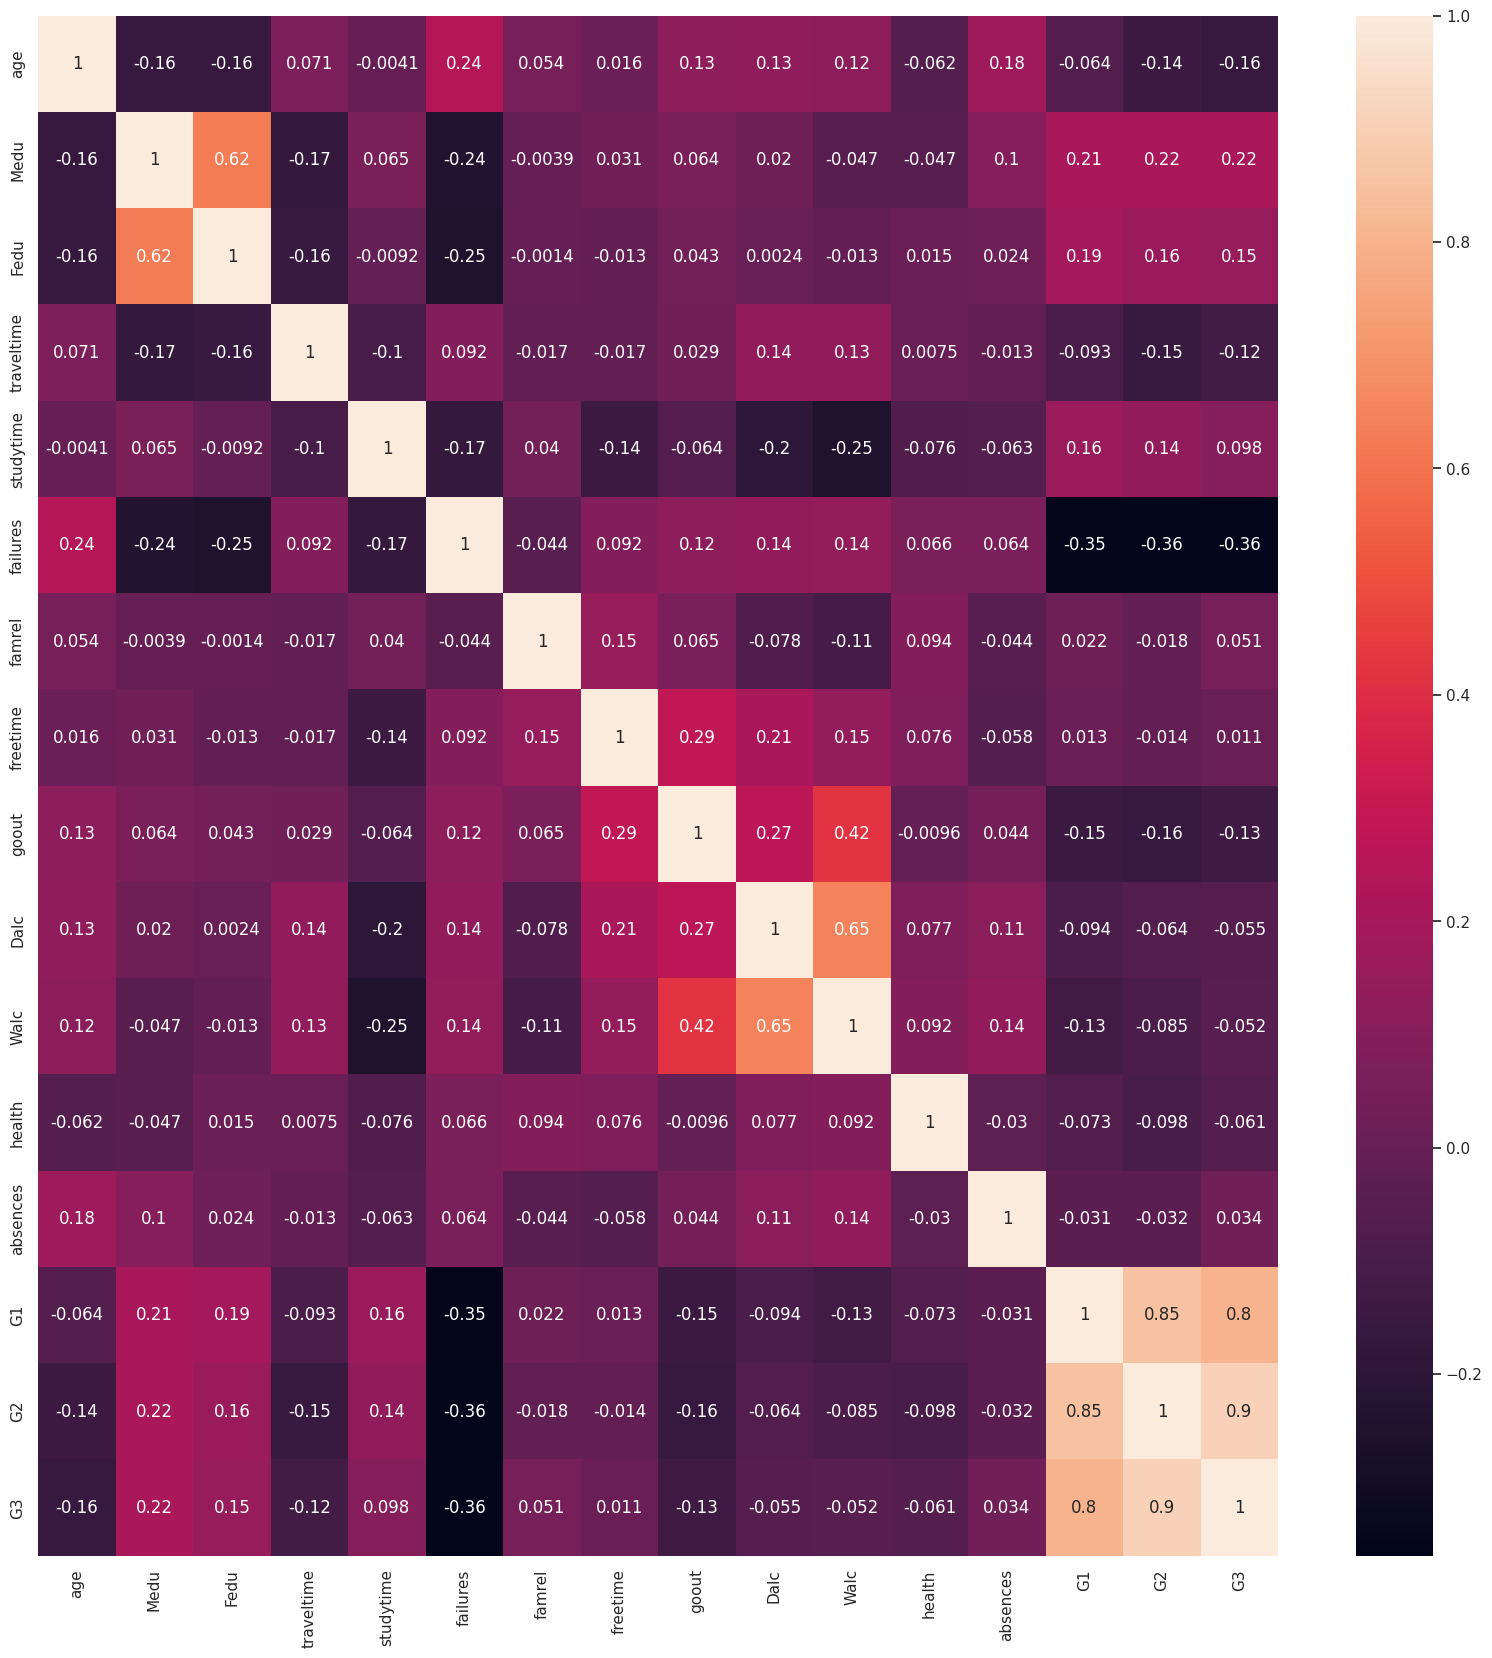

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

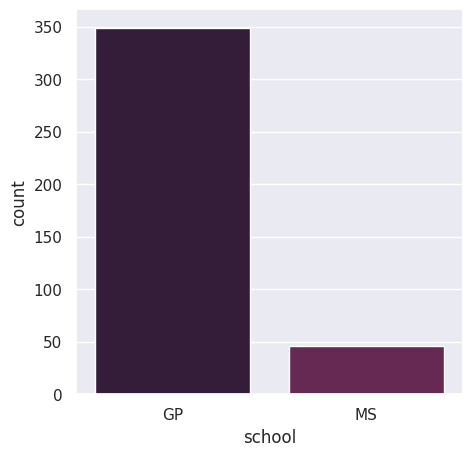

school 
 GP    349
MS     46
Name: school, dtype: int64


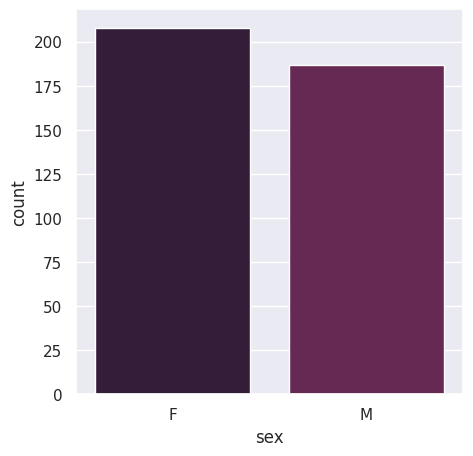

sex 
 F    208
M    187
Name: sex, dtype: int64


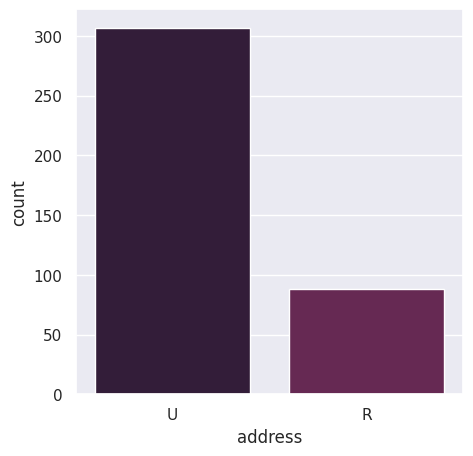

address 
 U    307
R     88
Name: address, dtype: int64


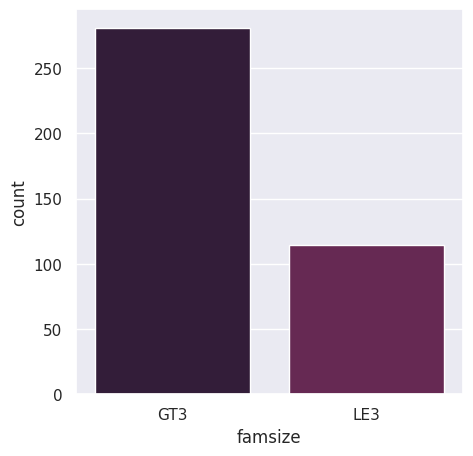

famsize 
 GT3    281
LE3    114
Name: famsize, dtype: int64


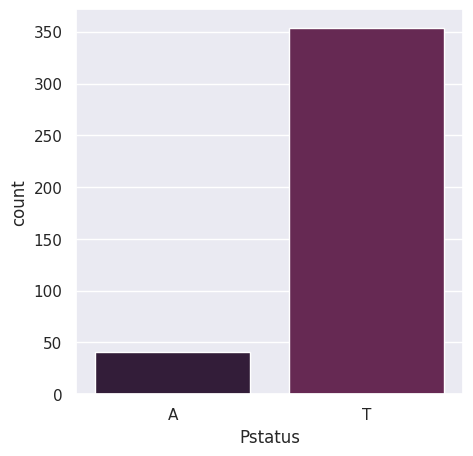

Pstatus 
 T    354
A     41
Name: Pstatus, dtype: int64


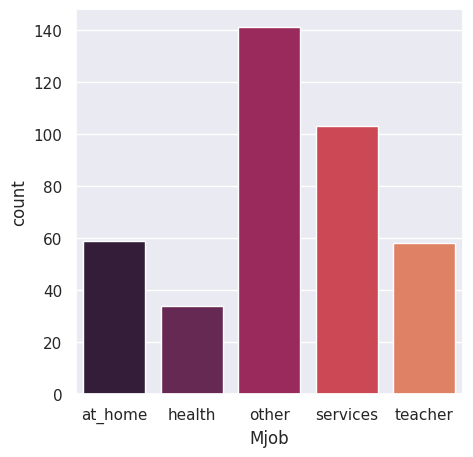

Mjob 
 other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


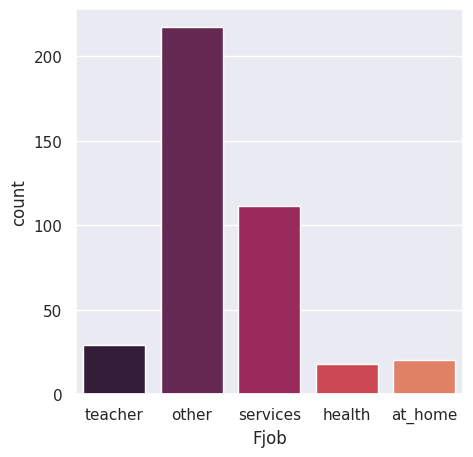

Fjob 
 other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


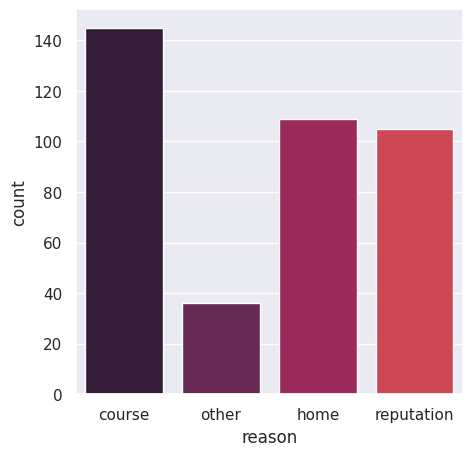

reason 
 course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64


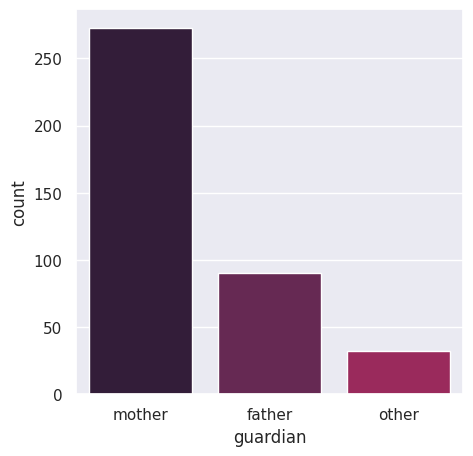

guardian 
 mother    273
father     90
other      32
Name: guardian, dtype: int64


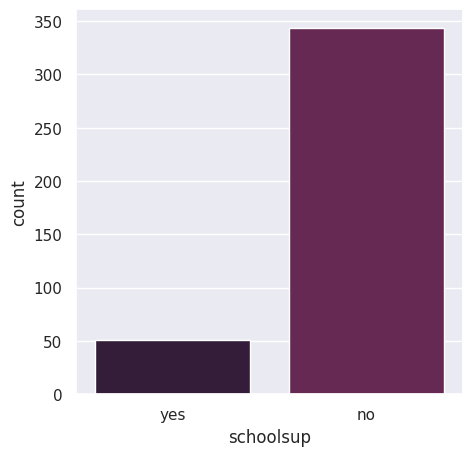

schoolsup 
 no     344
yes     51
Name: schoolsup, dtype: int64


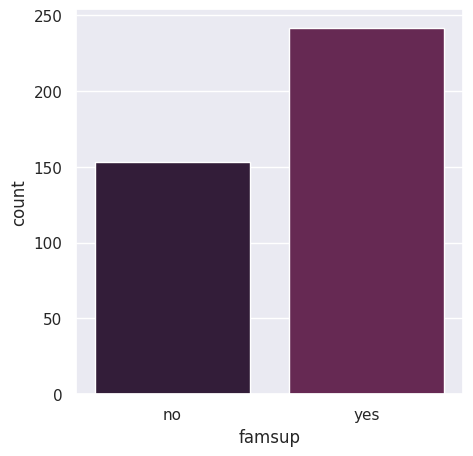

famsup 
 yes    242
no     153
Name: famsup, dtype: int64


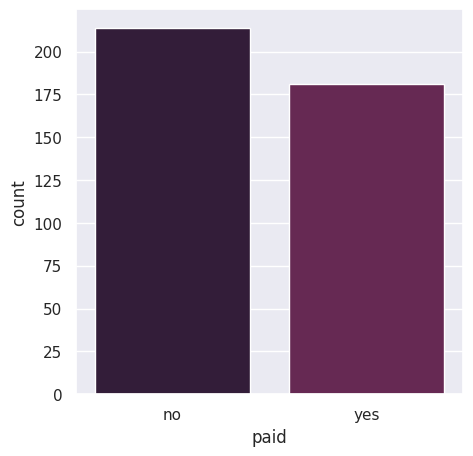

paid 
 no     214
yes    181
Name: paid, dtype: int64


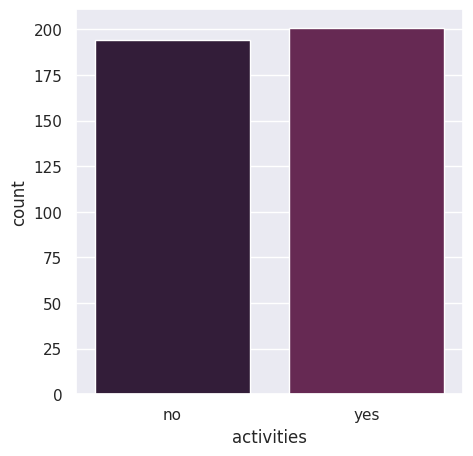

activities 
 yes    201
no     194
Name: activities, dtype: int64


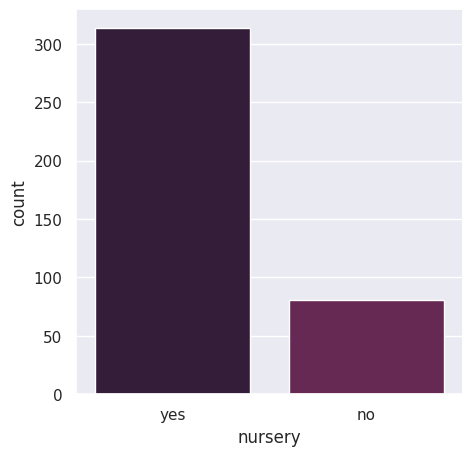

nursery 
 yes    314
no      81
Name: nursery, dtype: int64


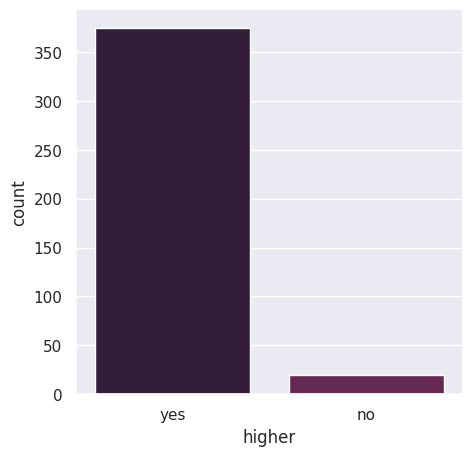

higher 
 yes    375
no      20
Name: higher, dtype: int64


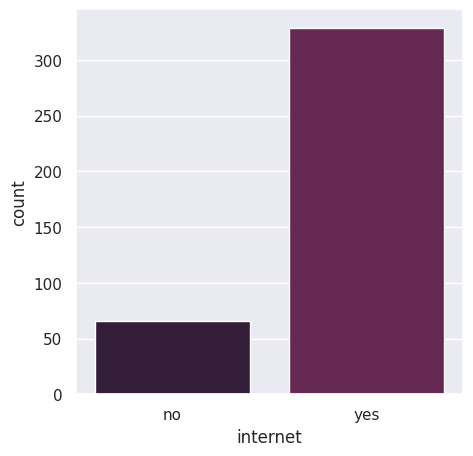

internet 
 yes    329
no      66
Name: internet, dtype: int64


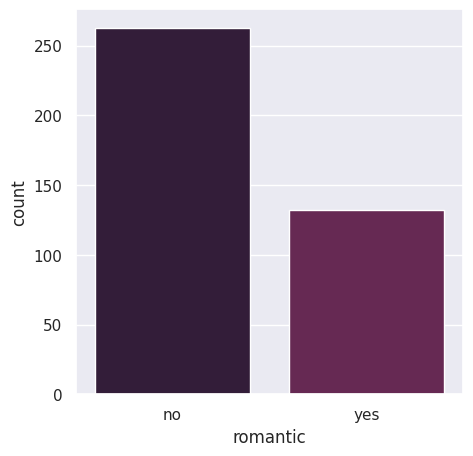

romantic 
 no     263
yes    132
Name: romantic, dtype: int64


In [24]:
col_1=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian","schoolsup", "famsup",  "paid", "activities", "nursery", "higher", "internet", "romantic"]
def count_plot(col_1):
        plt.figure(figsize=(5,5))
        sns.countplot(x=col_1,data=df)

        plt.show()
        print(col_1,"\n",df[col_1].value_counts())
# Print
for i in col_1:
        count_plot(i)

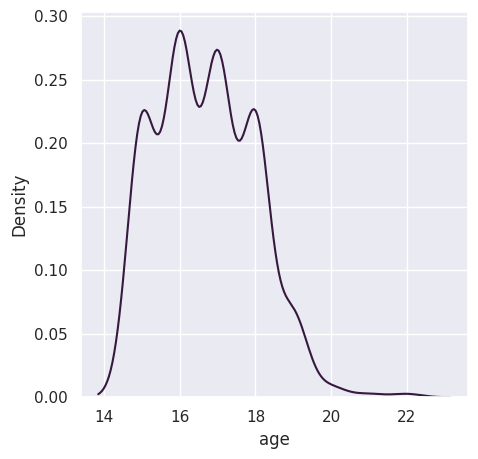

age 
 16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64


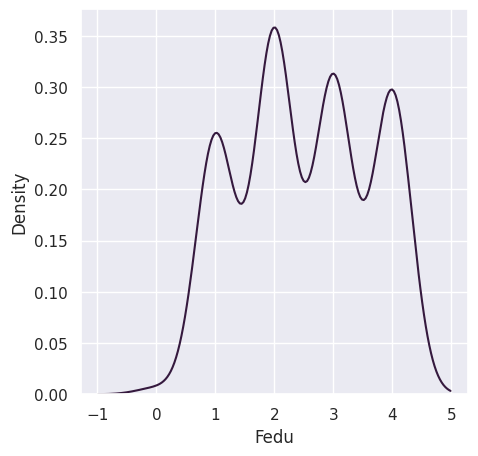

Fedu 
 2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


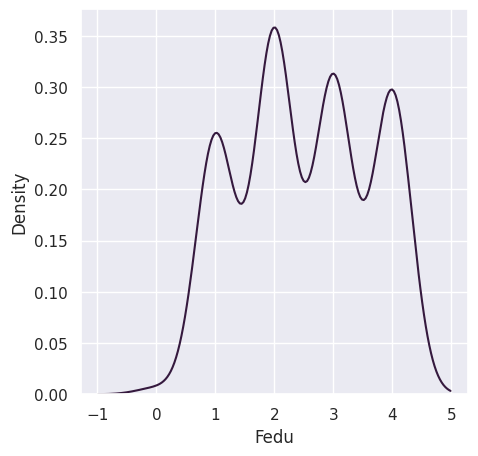

Fedu 
 2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


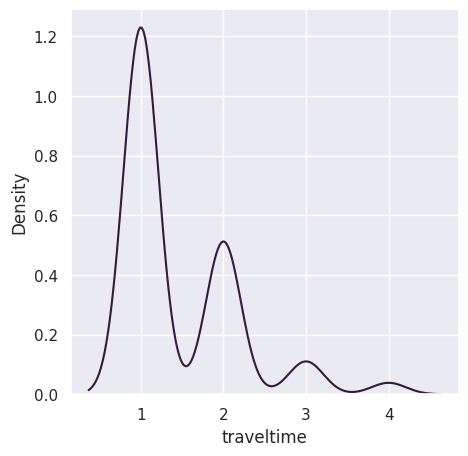

traveltime 
 1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64


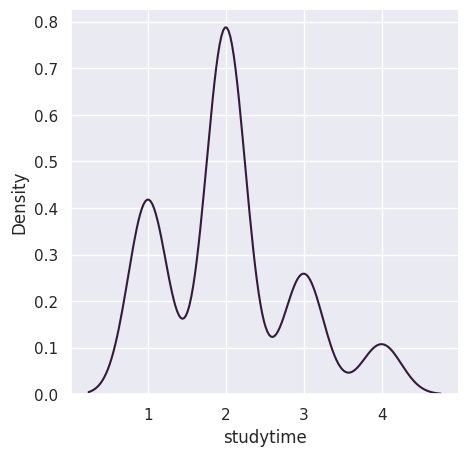

studytime 
 2    198
1    105
3     65
4     27
Name: studytime, dtype: int64


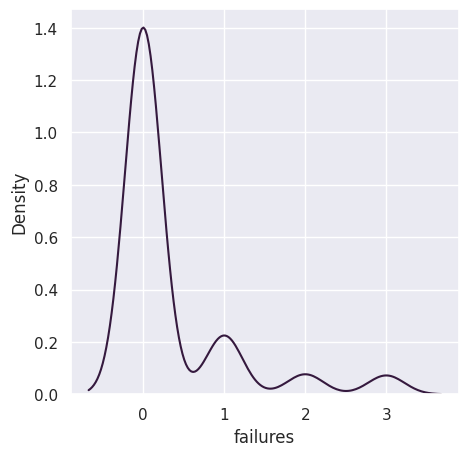

failures 
 0    312
1     50
2     17
3     16
Name: failures, dtype: int64


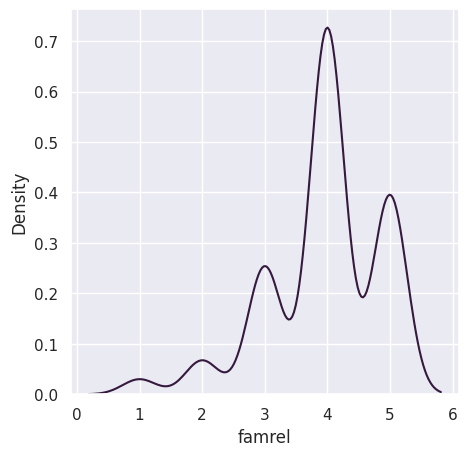

famrel 
 4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64


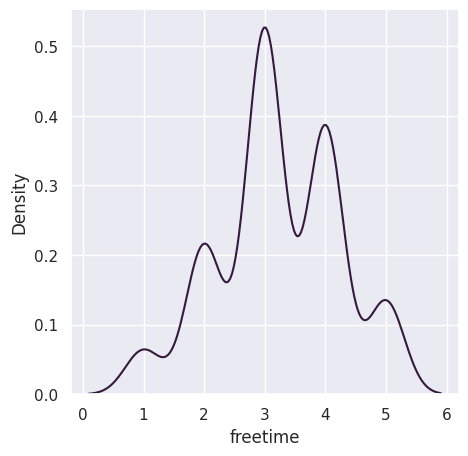

freetime 
 3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64


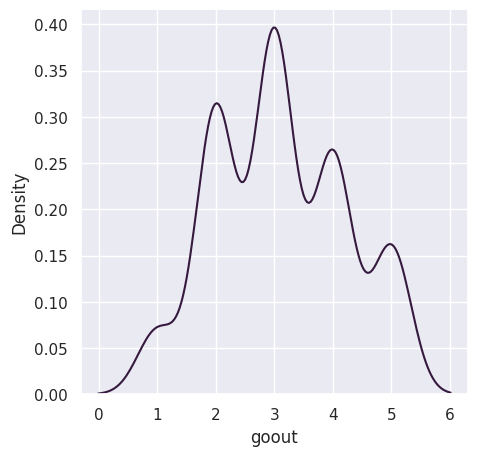

goout 
 3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64


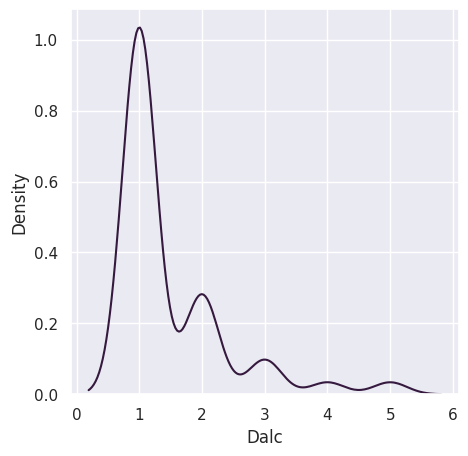

Dalc 
 1    276
2     75
3     26
4      9
5      9
Name: Dalc, dtype: int64


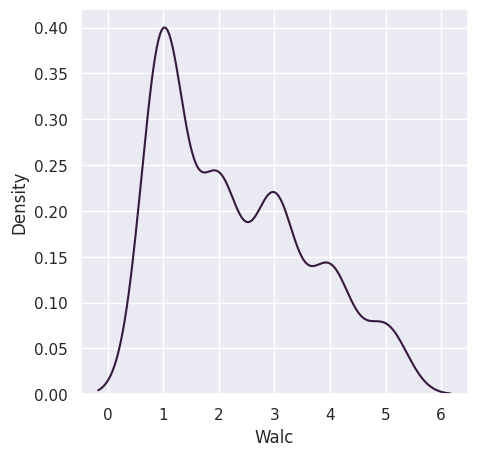

Walc 
 1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64


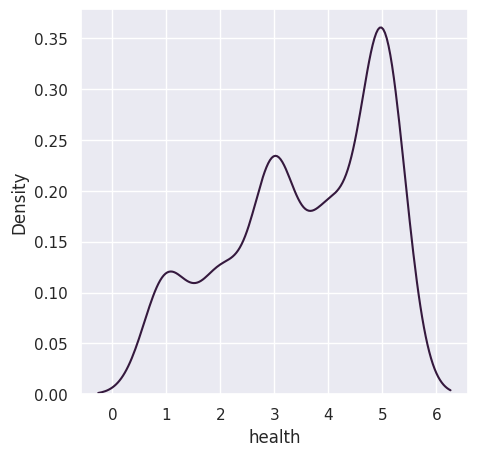

health 
 5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64


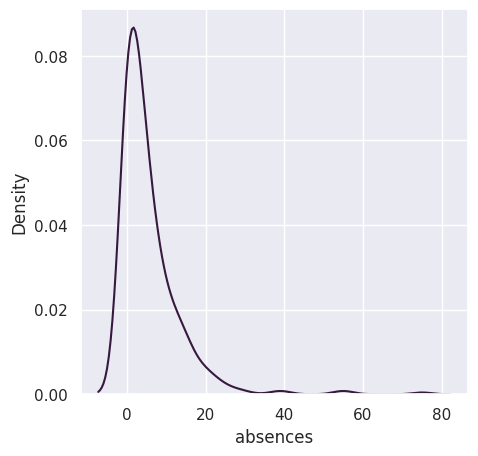

absences 
 0     115
2      65
4      53
6      31
8      22
10     17
12     12
14     12
3       8
16      7
7       7
5       5
18      5
20      4
22      3
1       3
13      3
15      3
11      3
9       3
28      1
56      1
54      1
40      1
38      1
30      1
17      1
26      1
25      1
24      1
23      1
21      1
19      1
75      1
Name: absences, dtype: int64


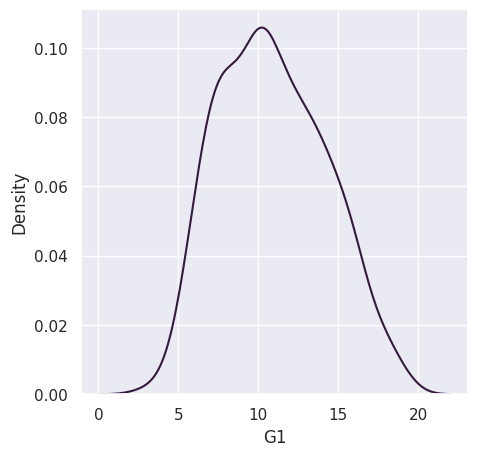

G1 
 10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
6     24
15    24
16    22
17     8
18     8
5      7
19     3
4      1
3      1
Name: G1, dtype: int64


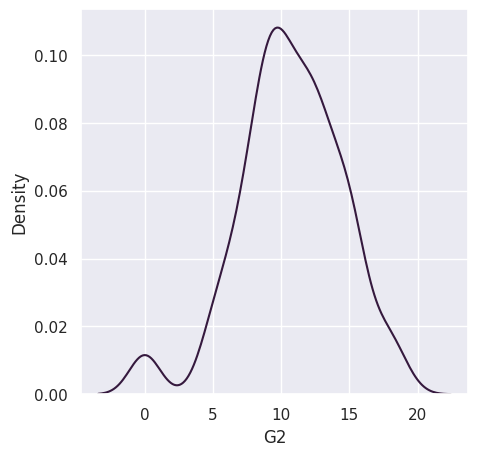

G2 
 9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
16    13
0     13
18    12
17     5
19     3
4      1
Name: G2, dtype: int64


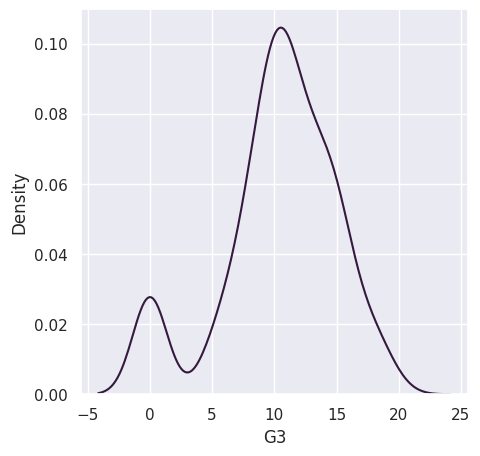

G3 
 10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64


In [25]:
col_2=["age", "Fedu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc" ,"health", "absences", "G1", "G2", "G3"]
def hist_plot(col_2):
        plt.figure(figsize=(5,5))
        sns.kdeplot(data=df, x=col_2)

        plt.show()
        print(col_2,"\n",df[col_2].value_counts())
# Print
for i in col_2:
        hist_plot(i)

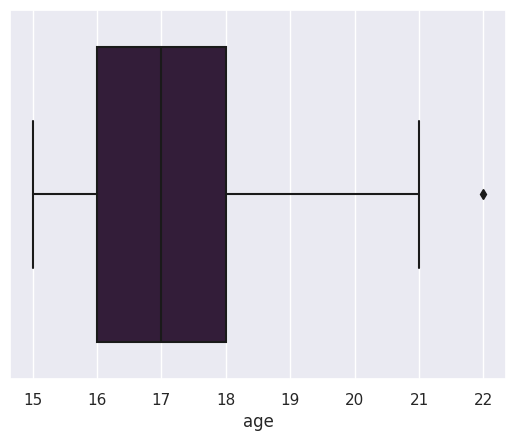

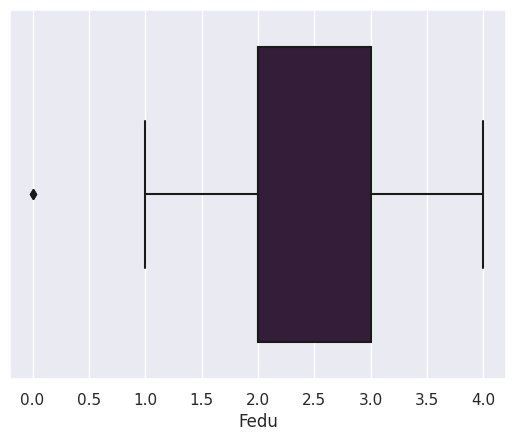

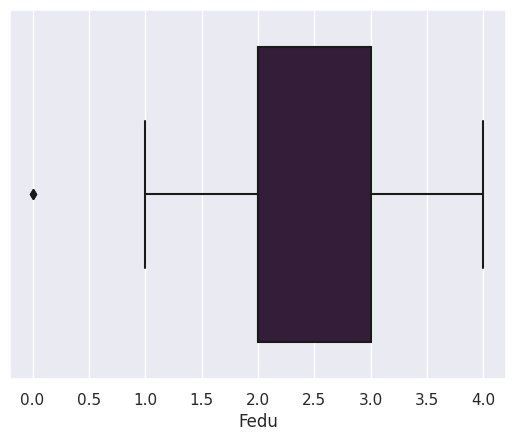

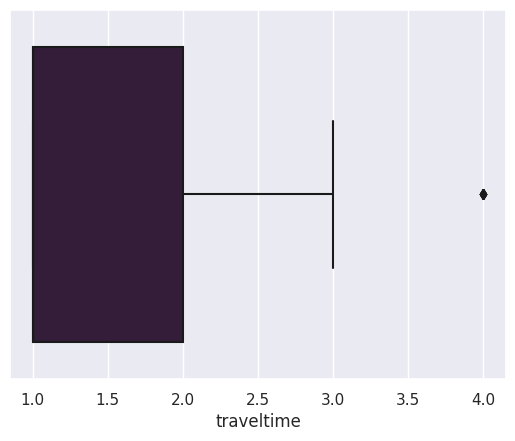

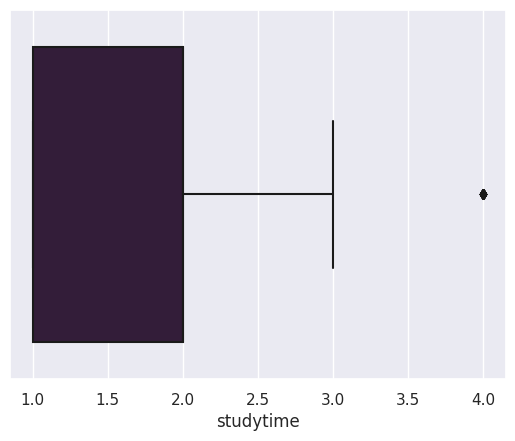

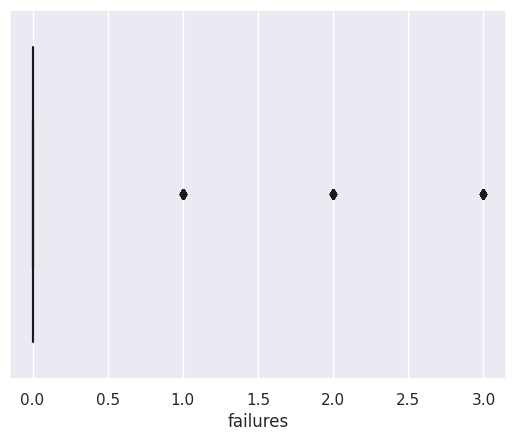

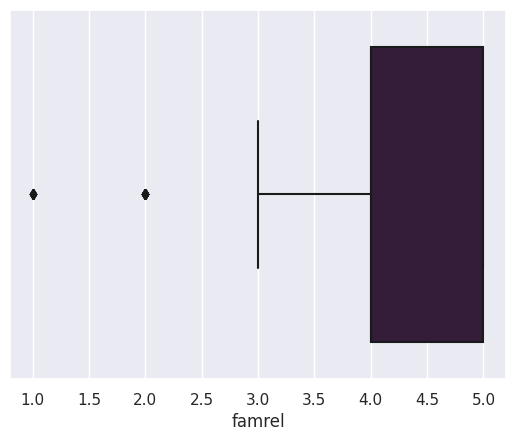

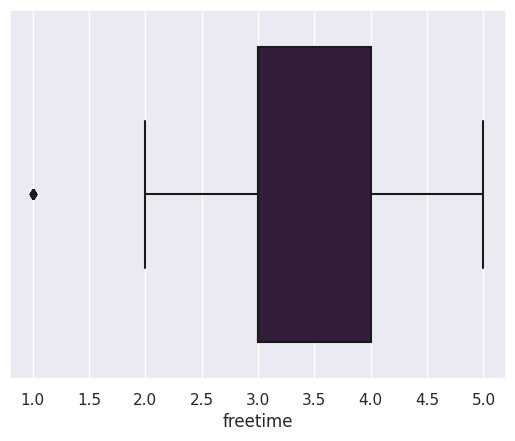

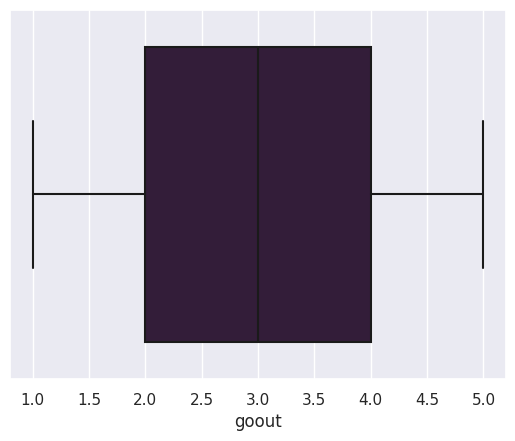

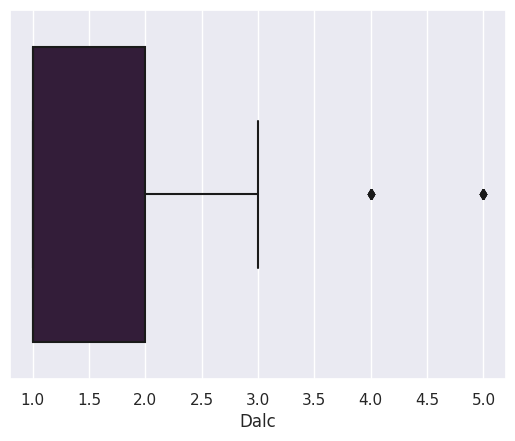

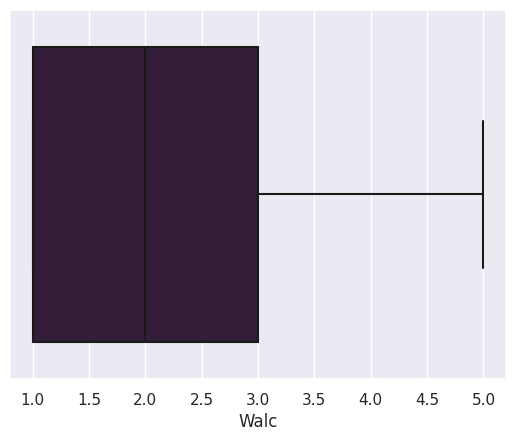

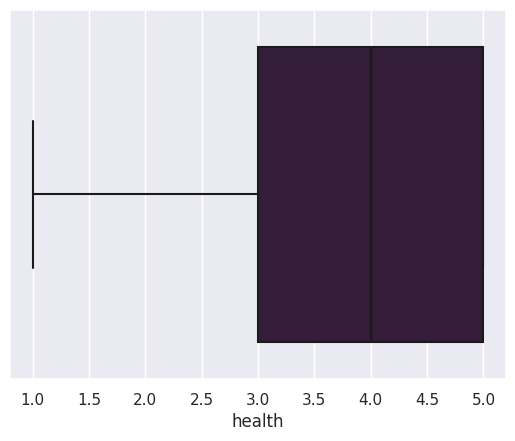

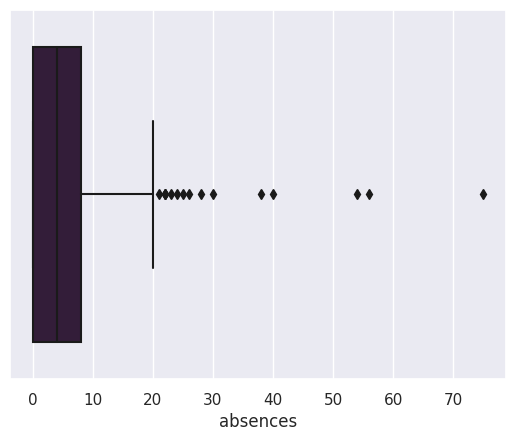

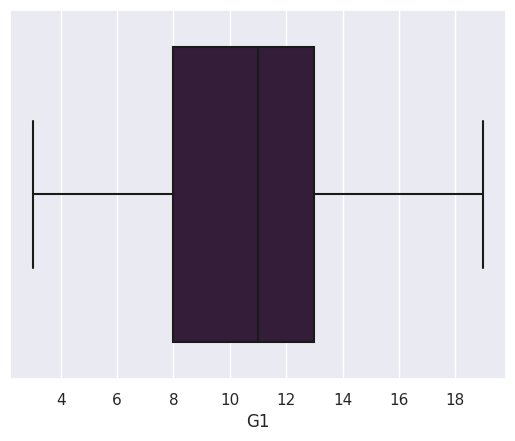

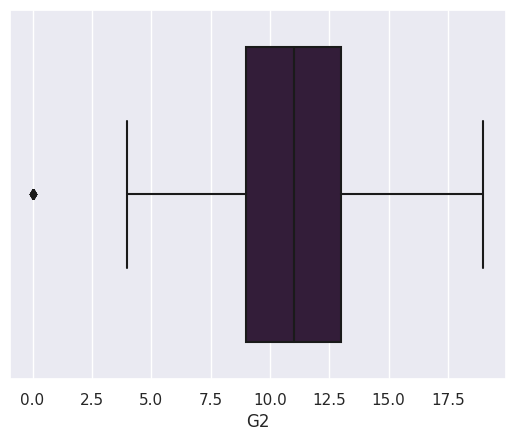

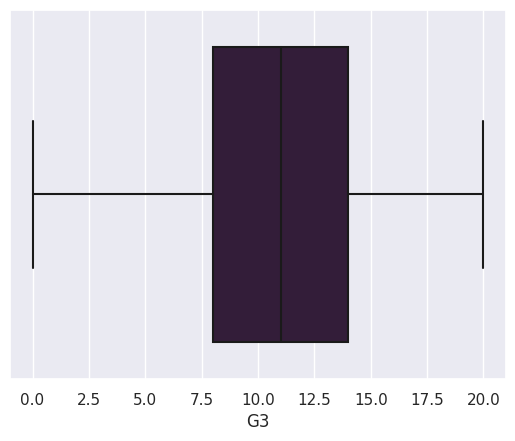

In [26]:
for i in col_2:
    ax=sns.boxplot(x=df[i])
    plt.show()

<AxesSubplot: xlabel='G1', ylabel='G2'>

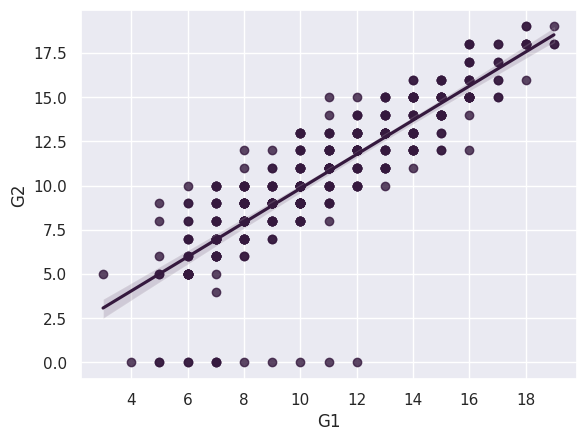

In [27]:
sns.regplot(x="G1", y="G2", data=df)

<AxesSubplot: xlabel='G2', ylabel='G3'>

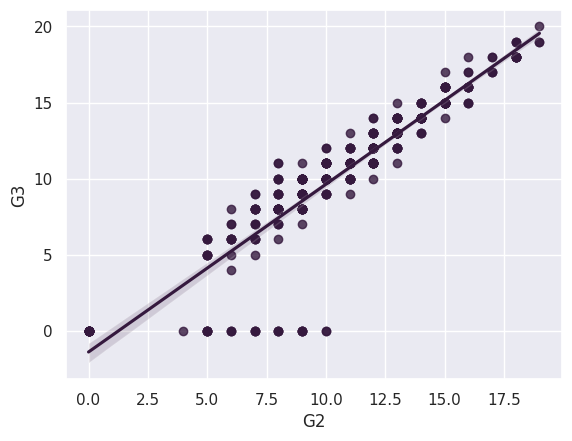

In [28]:
sns.regplot(x="G2", y="G3", data=df)

<AxesSubplot: xlabel='G1', ylabel='G3'>

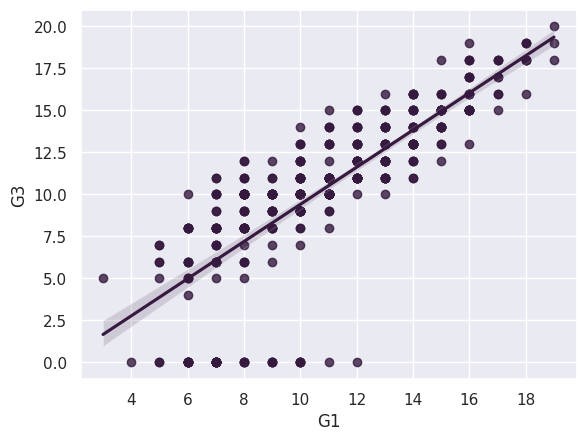

In [29]:
sns.regplot(x="G1", y="G3", data=df)

<AxesSubplot: xlabel='Dalc', ylabel='Walc'>

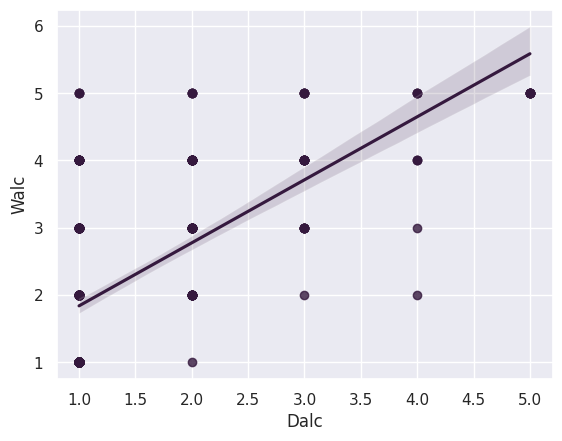

In [30]:
sns.regplot(x="Dalc",y="Walc",data=df)

In [31]:
#keseluruhan kolom kesehatan tiap masukan data
df['Overall Health'] = (0.5 * df['Dalc'] + 0.5 * df['Walc'] + 2 * df['health'] + df['famrel']) / 4

# Grafik Kesehatan vs Nilai Akhir

<AxesSubplot: xlabel='Overall Health', ylabel='G3'>

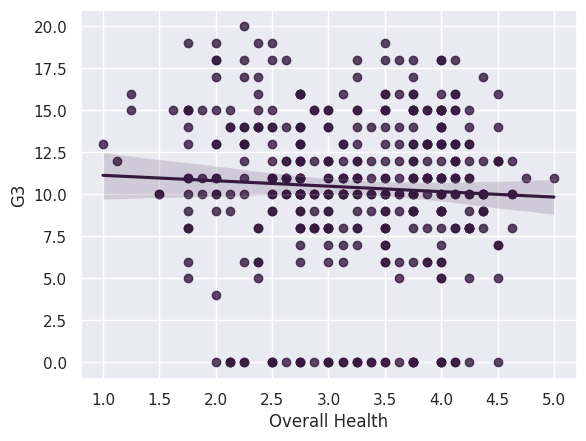

In [32]:
sns.regplot(x='Overall Health', y='G3', data=df)

Secara umum nilai kesehatan keseluruhan yang lebih baik sesuai dengan nilai akhir yang lebih rendah. Sebaliknya, nilai kesehatan keseluruhan yang lebih rendah umumnya sesuai dengan nilai akhir yang lebih tinggi.
Kemiringan garis paling pas adalah jarak kecil dari nol, sehingga korelasi antara Kesehatan Keseluruhan dan G3 rendah.

# Grafik absensi vs Nilai akhir

[Text(0.5, 1.0, 'Absences vs G3')]

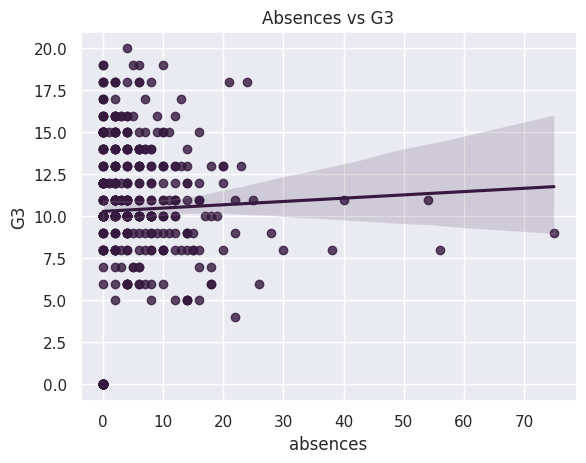

In [33]:
sns.regplot(x='absences', y='G3', data=df).set(title='Absences vs G3')

Tidak ada korelasi antara Absensi dan G3

[Text(0.5, 1.0, 'Absences vs G1')]

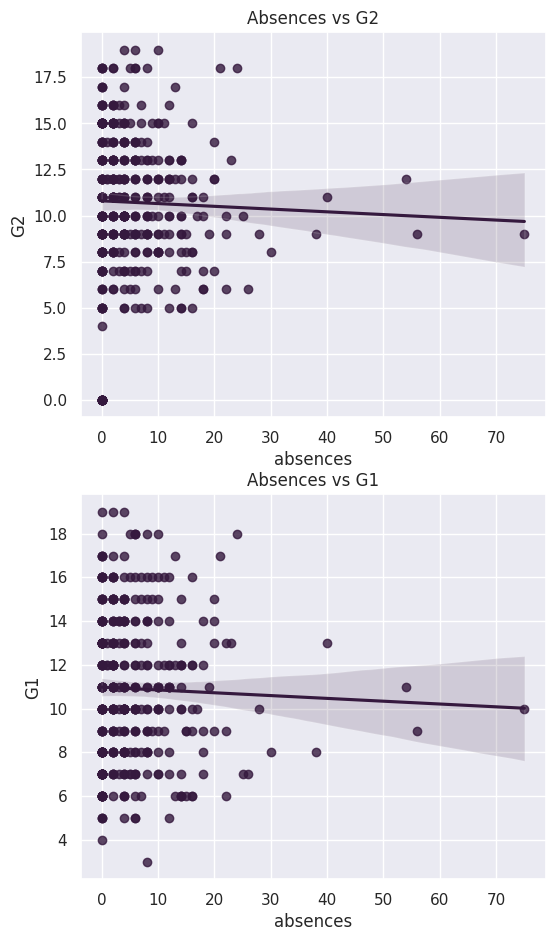

In [34]:
fig, axes = plt.subplots(2,1, figsize=(6,11))
sns.regplot(x='absences', y='G2', data=df, ax=axes[0])
axes[0].set(title='Absences vs G2')

sns.regplot(x='absences', y='G1', data=df, ax=axes[1])
axes[1].set(title='Absences vs G1')

Korelasi rendah  karena siswa yang tidak hadir merevisi materi yang terlewatkan, secara efektif memperhitungkan ketidakhadiran mereka.

<AxesSubplot: >

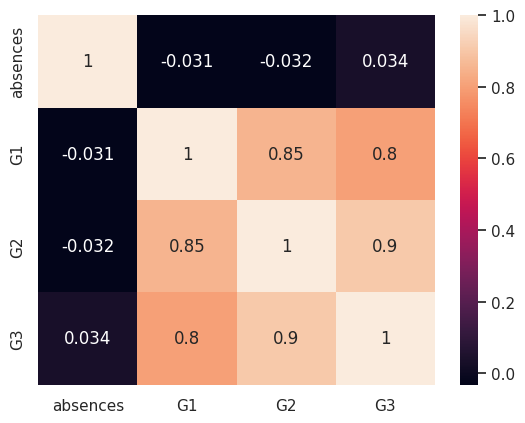

In [35]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

Dari heatmap di atas didapat bahwa koefisien korelasi untuk metrik yang diamati dan Ketidakhadiran bernilai negatif.

Sehingga jumlah ketidakhadiran yang dimiliki siswa tidak selalu menghasilkan nilai yang lebih rendah secara keseluruhan, karena siswa yang tidak hadir biasanya mempelajari materi yang mereka lewatkan.

# Grafik Umur vs Nilai

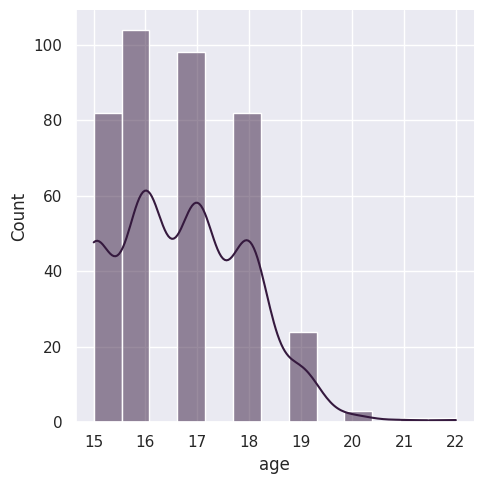

In [36]:
# Visualisi distribusi umur
sns.displot(x='age', data=df, kind='hist', kde=True)

In [37]:
age_grade = df.groupby("age").aggregate({'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade

,age,G1,G2,G3
0,15,11.231707,11.365854,11.256098
1,16,10.942308,11.182692,11.028846
2,17,10.897959,10.479592,10.275510
3,18,10.719512,10.134146,9.548780
4,19,10.250000,9.250000,8.208333
5,20,13.666667,13.666667,14.000000
6,21,10.000000,8.000000,7.000000
7,22,6.000000,8.000000,8.000000


Hasil pengamatan disimpulkan bahwa ketika usia lebih tua, kecenderungan nilainya menurun.

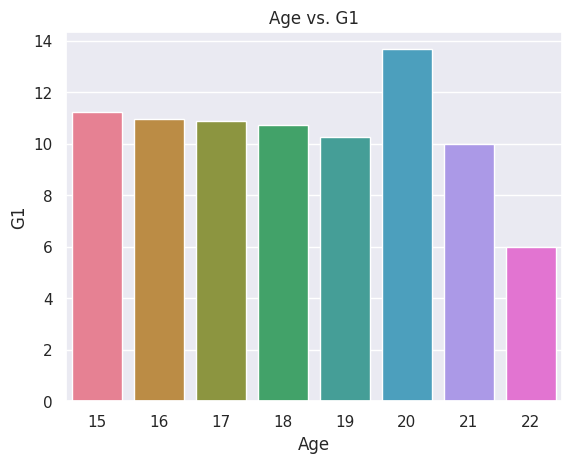

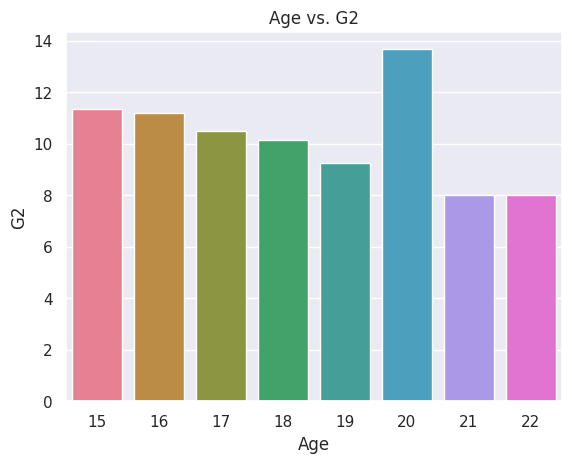

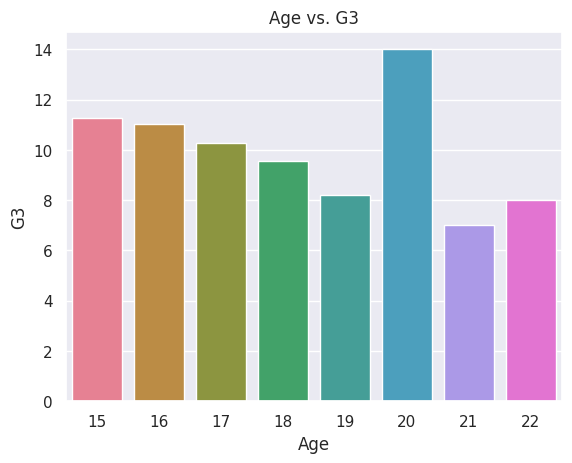

In [38]:
grades = ['G1', 'G2', 'G3']

for grade in grades:
    sns.barplot(data=age_grade, x='age', y=grade, palette='husl').set(xlabel='Age', ylabel=grade, title=f'Age vs. {grade}')
    plt.show()

# Grafik level pendidikan vs pekerjaan

In [39]:
mjob_edu = df.groupby("Mjob").aggregate({"Medu": "mean"})
mjob_edu.reset_index(inplace=True)
mjob_edu.sort_values(by='Medu', ascending=False, inplace=True)

[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'Education Lvl.'),
 Text(0.5, 1.0, 'Job vs. Edu. Lvl. (Mother)')]

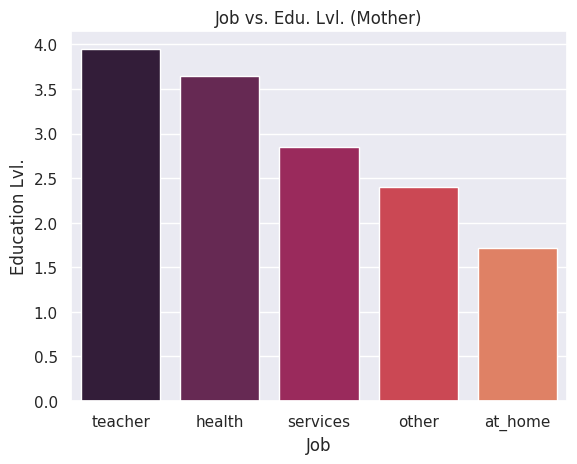

In [40]:
sns.barplot(x='Mjob', y='Medu', data=mjob_edu).set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)')

Guru dan profesional perawat kesehatan perlu memiliki tingkat pendidikan yang tinggi untuk memperoleh pekerjaan di industri, dan sebaliknya dengan ibu rumah tangga.

[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'Education Lvl.'),
 Text(0.5, 1.0, 'Job vs. Edu. Lvl. (Father)')]

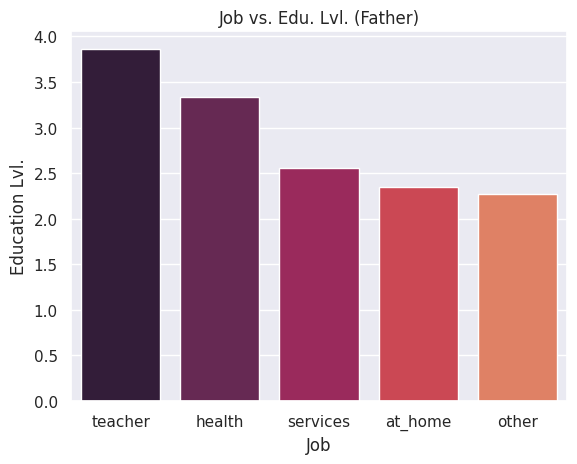

In [41]:
fjob_edu = df.groupby("Fjob").aggregate({"Fedu": "mean"})
fjob_edu.reset_index(inplace=True)
fjob_edu.sort_values(by='Fedu', ascending=False, inplace=True)
sns.barplot(x='Fjob', y='Fedu', data=fjob_edu).set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)')

Guru dan profesional perawat kesehatan memiliki tingkat pendidikan yang lebih tinggi sementara orang tua di rumah cenderung tinggal di bawah  tingkat pendidikan.

<AxesSubplot: xlabel='Time Productivity', ylabel='G3'>

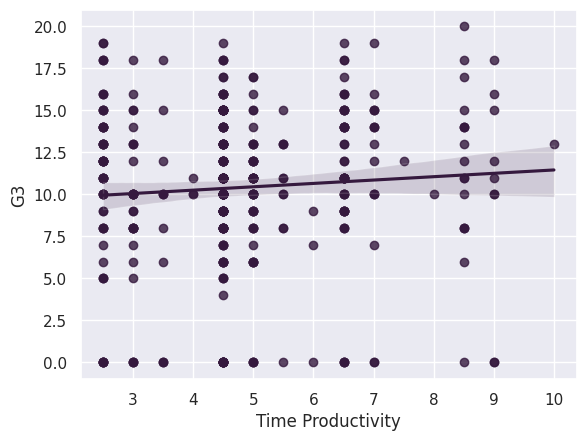

In [42]:
df['Time Productivity'] = 0.5 * df['traveltime'] + 2 * df['studytime']
sns.regplot(x='Time Productivity', y='G3', data=df)

Siswa dengan produktivitas tinggi memiliki nilai lebih baik

<AxesSubplot: xlabel='studytime', ylabel='G3'>

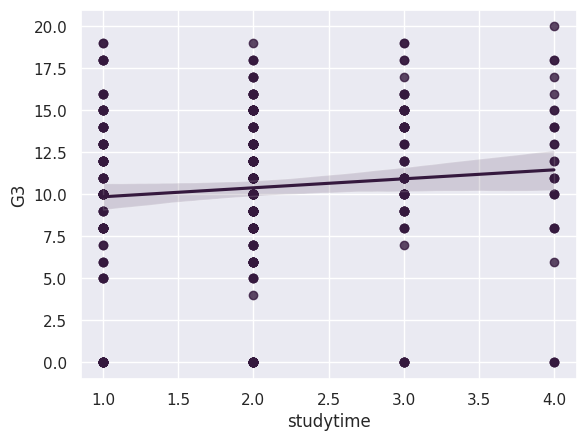

In [43]:
sns.regplot(x='studytime', y='G3', data=df)

<AxesSubplot: xlabel='traveltime', ylabel='G3'>

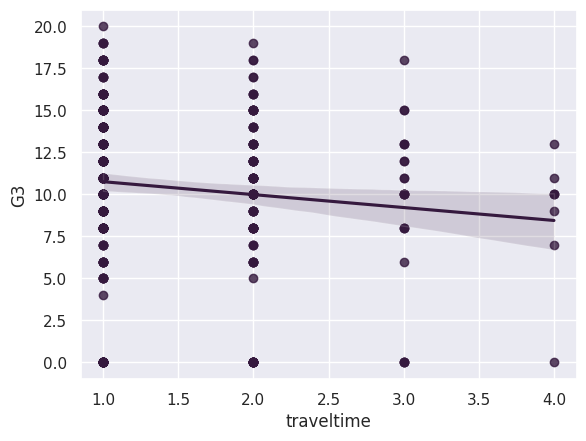

In [44]:
sns.regplot(x='traveltime', y='G3', data=df)

Siswa yang belajar lebih banyak mendapat nilai lebih baik pada tes dan kuis. Sebaliknya, siswa yang bepergian lebih banyak tampil lebih buruk pada tes dan kuis.

# Grafik pekerjaan vs nilai akhir

In [45]:
mjob_gr = df.groupby("Mjob").aggregate({"G3": "mean"}).reset_index()
mjob_gr

,Mjob,G3
0,at_home,9.152542
1,health,12.147059
2,other,9.822695
3,services,11.019417
4,teacher,11.051724


[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'G3'),
 Text(0.5, 1.0, 'Job vs. Grade (Mother)')]

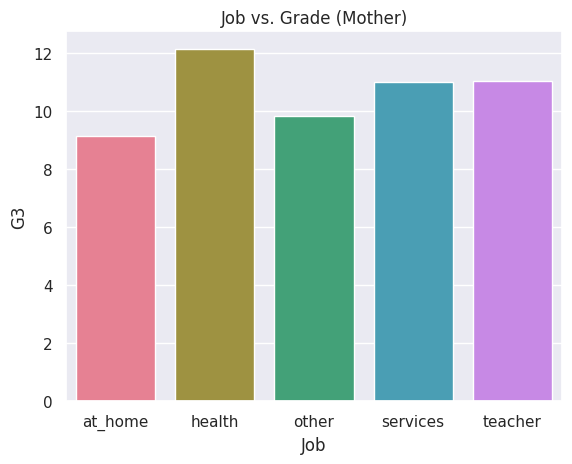

In [46]:
sns.barplot(data=mjob_gr, x='Mjob', y='G3', palette='husl').set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Mother)')

Siswa dengan ibu yang merupakan profesional perawat kesehatan memiliki nilai yang lebih tinggi secara rata-rata

# Pekerjaan Ayah

In [47]:
fjob_gr = df.groupby("Fjob").aggregate({"G3": "mean"}).reset_index()
fjob_gr

,Fjob,G3
0,at_home,10.150000
1,health,11.611111
2,other,10.193548
3,services,10.297297
4,teacher,11.965517


[Text(0.5, 0, 'Job'),
 Text(0, 0.5, 'G3'),
 Text(0.5, 1.0, 'Job vs. Grade (Father)')]

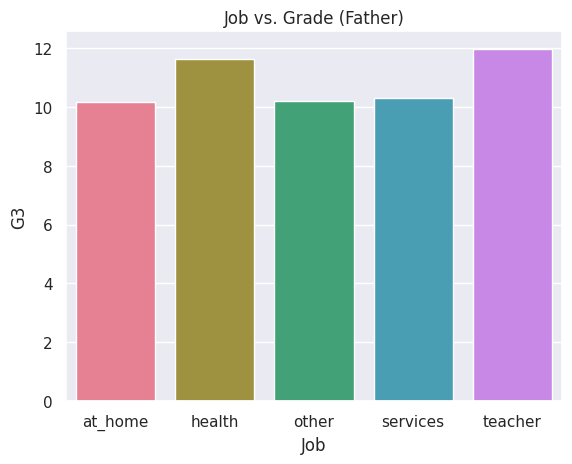

In [48]:
sns.barplot(data=fjob_gr, x='Fjob', y='G3', palette='husl').set(xlabel='Job', ylabel='G3', title='Job vs. Grade (Father)')

Perhatikan bahwa urutan hasil ini sesuai dengan urutan tingkat pendidikan ayah. Dengan kata lain, ayah dengan tingkat pendidikan yang lebih tinggi cenderung meningkatkan kinerja anak-anak mereka lebih banyak daripada ayah dengan tingkat pendidikan yang lebih rendah. Sang ayah langsung mewariskan ilmunya, sehingga mempengaruhi performa siswa.

Disimpulkan bahwa ibu yang bekerja di industri kesehatan memiliki anak yang rata-rata menerima nilai lebih tinggi daripada ibu yang bekerja di bidang lain.

Ayah dengan tingkat pendidikan yang lebih tinggi secara langsung meneruskan pengetahuan itu kepada siswa, akhirnya meningkatkan nilai ujian siswa secara keseluruhan.

# Family Size vs. Grade

In [49]:
size_gr = df.groupby("famsize").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
size_gr

,famsize,G1,G2,G3
0,GT3,10.758007,10.519573,10.177936
1,LE3,11.280702,11.192982,11.000000


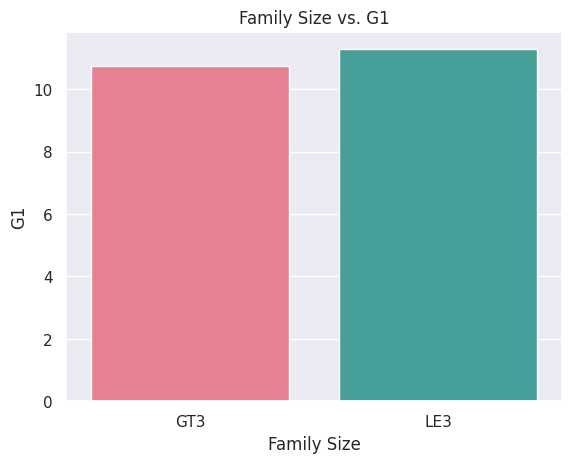

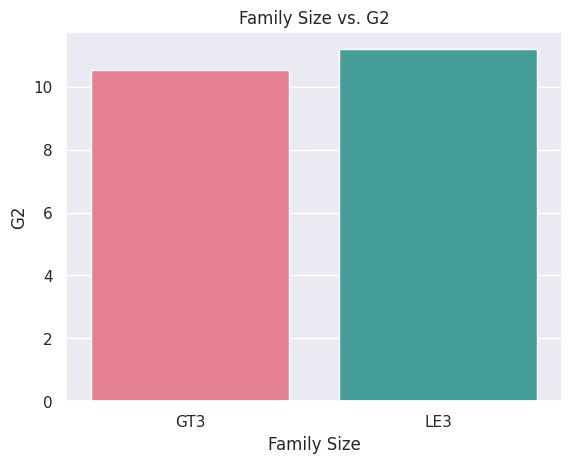

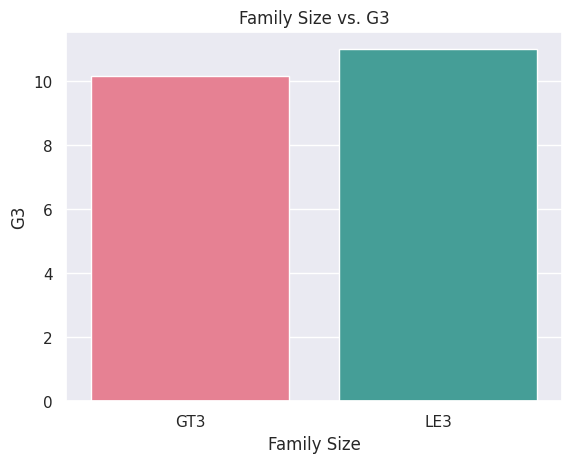

In [50]:
for grade in grades:
    sns.barplot(data=size_gr, x='famsize', y=grade, palette='husl').set(xlabel='Family Size', ylabel=grade, title=f'Family Size vs. {grade}')
    plt.show()

Anak-anak tanpa saudara kandung cenderung mendapat skor sedikit , sangat sedikit/lebih tinggi daripada siswa dengan saudara kandung.

# Aktivitas VS Nilai

In [51]:
act_gr = df.groupby("activities").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr

,activities,G1,G2,G3
0,no,10.716495,10.520619,10.340206
1,yes,11.094527,10.900498,10.487562


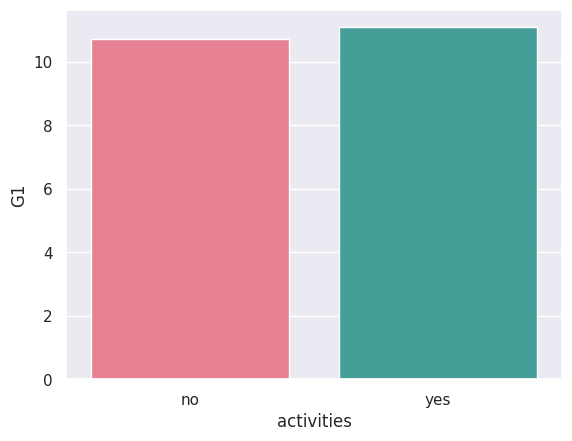

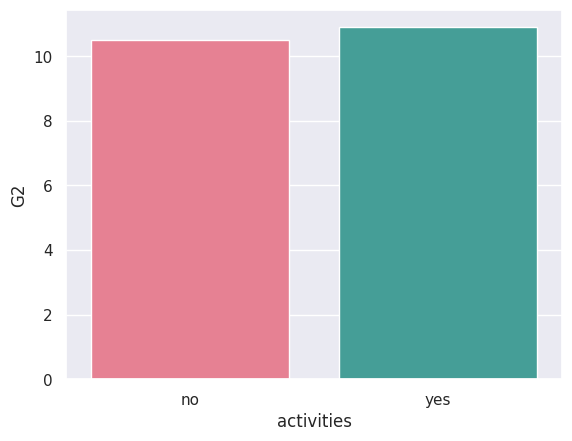

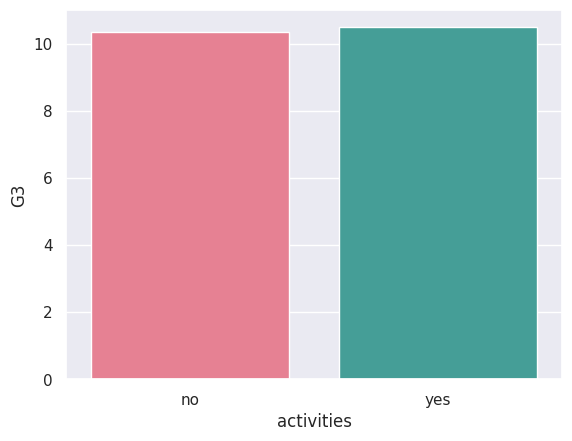

In [52]:
for grade in grades:
    sns.barplot(data=act_gr, x='activities', y=grade, palette='husl')
    plt.show()

In [54]:
out_gr = df.groupby("goout").aggregate({"G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr

,goout,G1,G2,G3
0,1,11.130435,10.782609,9.869565
1,2,11.368932,11.456311,11.194175
2,3,11.276923,11.053846,10.961538
3,4,10.430233,10.058140,9.651163
4,5,9.792453,9.471698,9.037736


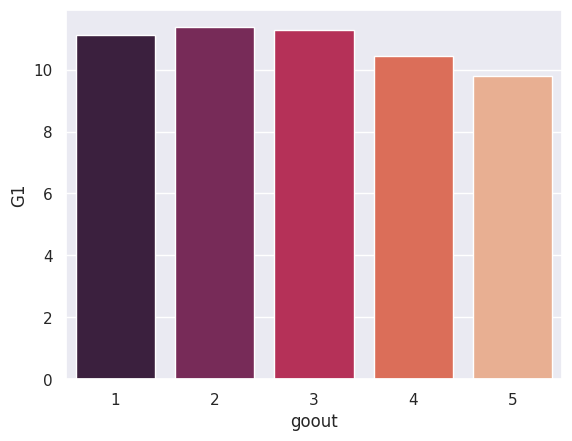

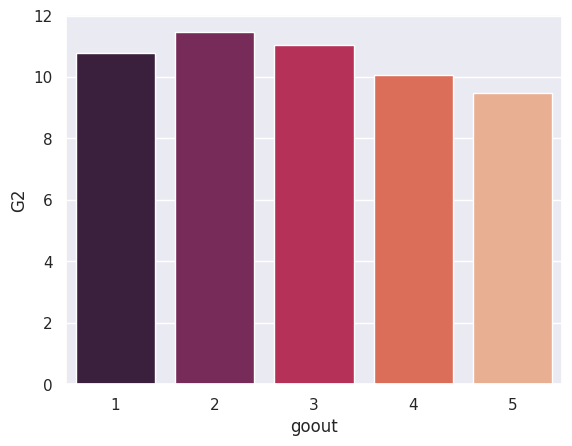

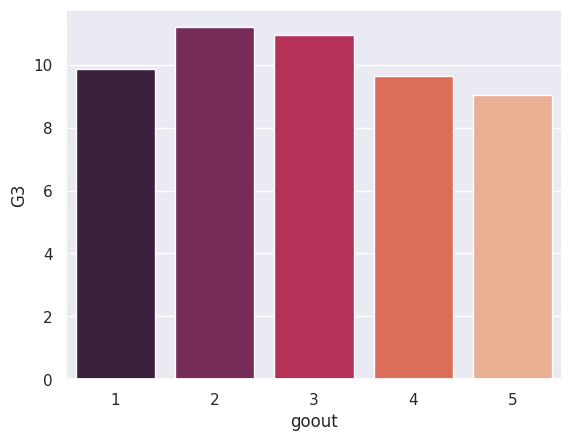

In [55]:
for grade in grades:
    sns.barplot(data=out_gr, x='goout', y=grade, palette='rocket')
    plt.show()

Bagian ini menggambarkan hubungan antara seberapa sering seorang siswa terlibat dalam kegiatan sosial. Siswa dengan aktivitas sosial, secara umum, mendapat nilai lebih baik daripada siswa tanpa sosialisasi.

Sebaliknya, siswa yang keluar lebih sering cenderung mendapat nilai di sisi bawah spektrum kelas.

# Pre processing data

- Menangani nilai yang hilang

- Menetapkan nilai numerik ke data kategoris

- Menormalkan fitur (sehingga fitur dalam skala kecil tidak mendominasi saat menyesuaikan model ke data).

- Menemukan fitur data yang paling prediktif dan filter sehingga akan meningkatkan kekuatan prediksi.

In [57]:
#daftar kolom berupa categorial
cat_col = df.select_dtypes(include=['object']).columns.tolist()
#daftar kolom berupa numerical
num_col = df.select_dtypes(include=['number']).columns.tolist()
cat_col

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [58]:
#import library preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

Label encoding: tetapkan 32 fitur ke array NumPy X dan enkodekan representasi string asli pada kolom kategoris ke dalam bilangan bulat untuk memulai fase machine learning.

In [59]:
new_df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet',
 'romantic'])

In [60]:
X = new_df.drop('G3', axis=1).values
y = new_df['G3'].values

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((276, 60), (276,), (119, 60), (119,))

In [75]:
# Scaling data dengan pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test

array([[ 0.21668659, -0.69162477, -1.41883525, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.99338138, -1.62735241, -0.47975005, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       [ 0.99338138,  0.24410286,  0.45933515, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       ...,
       [ 0.99338138,  0.24410286, -0.47975005, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.21668659, -0.69162477,  0.45933515, ..., -2.32778965,
         0.72447352, -0.72447352],
       [-0.5600082 ,  1.1798305 ,  1.39842035, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ]])

In [76]:
from sklearn.linear_model import LinearRegression

# algoritma regresi
lin_reg = LinearRegression(normalize=True)

# Fitting Simple Linear Regression ke set training
lin_reg.fit(X_train,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [77]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Regresi Linear

In [78]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.5281829319564988
MSE: 5.035848550843891
RMSE: 2.244069640373019
R2 Square 0.7709110170372763
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.1503169458547864
MSE: 2.7216544728392518
RMSE: 1.6497437597515718
R2 Square 0.8671066743053562
__________________________________


# Menggunakan Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.085966386554622
MSE: 3.218325714285714
RMSE: 1.7939692623581134
R2 Square 0.8535931020791037
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.35906521739130437
MSE: 0.3230634927536232
RMSE: 0.5683867457582233
R2 Square 0.9842254105394325
__________________________________


# Menggunakan Support Vector Regression

In [80]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1.801055469746227
MSE: 6.494649693143759
RMSE: 2.5484602592828005
R2 Square 0.704547768289787
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010538717182886639
MSE: 1.1678456450911216e-06
RMSE: 0.001080669072885461
R2 Square 0.9999999429762693
__________________________________


In [81]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.528183,5.035849,2.244070,0.770911,0.781498
1,Random Forest Regressor,1.085966,3.218326,1.793969,0.853593,0.000000
2,SVM Regressor,1.801055,6.494650,2.548460,0.704548,0.000000


 R-kuadrat menunjukkan seberapa baik data cocok dengan model  ( kecocokan). Random forest pada kasus ini memiliki hasil terbaik.

<AxesSubplot: ylabel='Model'>

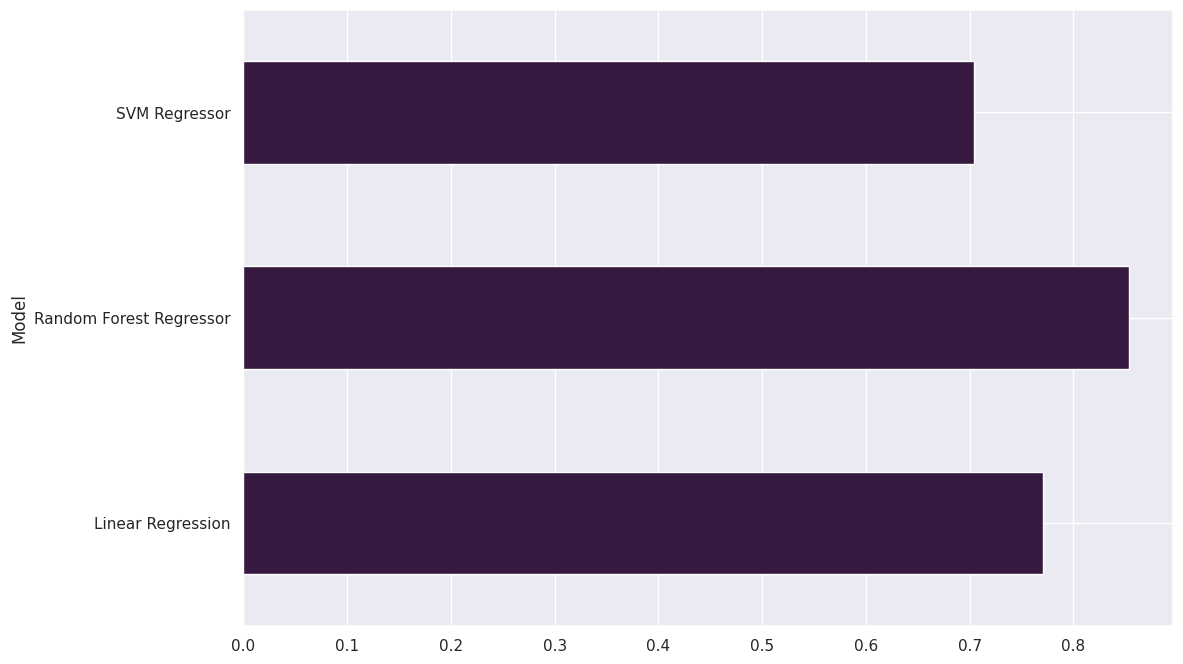

In [82]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Seleksi Fitur

In [91]:
X = new_df.drop('G3', axis=1)
y = new_df['G3']

In [92]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [93]:
print(selection.feature_importances_)

[6.42971302e-03 3.29487640e-03 1.95780473e-03 6.14289038e-03
 8.20679253e-03 8.10825450e-03 5.31010160e-03 2.63259801e-03
 5.18636391e-03 2.08054747e-03 3.52315322e-03 5.84344337e-03
 3.85995589e-02 2.21056749e-01 5.92511088e-01 6.75028974e-03
 6.21145314e-03 1.74039783e-03 1.88037614e-03 1.34943502e-03
 1.13987890e-03 7.73073824e-04 6.81147083e-04 5.57600639e-04
 8.75825351e-04 5.72958633e-04 2.82823335e-04 2.43889749e-03
 1.27351274e-03 2.60008433e-03 2.63040246e-03 1.76467343e-03
 3.22123522e-03 5.29229316e-04 2.25369113e-03 4.72834939e-03
 7.00100769e-04 1.38790458e-03 7.14026054e-03 6.31806214e-04
 1.45515322e-03 1.65399043e-03 2.44461662e-03 4.58242914e-03
 1.33880322e-03 1.79462057e-03 1.12790737e-03 1.02408631e-03
 1.27981923e-03 1.46045368e-03 3.93107159e-03 1.74979009e-03
 1.25292939e-03 1.73680843e-03 1.49396057e-03 1.78965895e-03
 8.50858897e-04 7.46316069e-04 1.65050906e-03 1.63687532e-03]


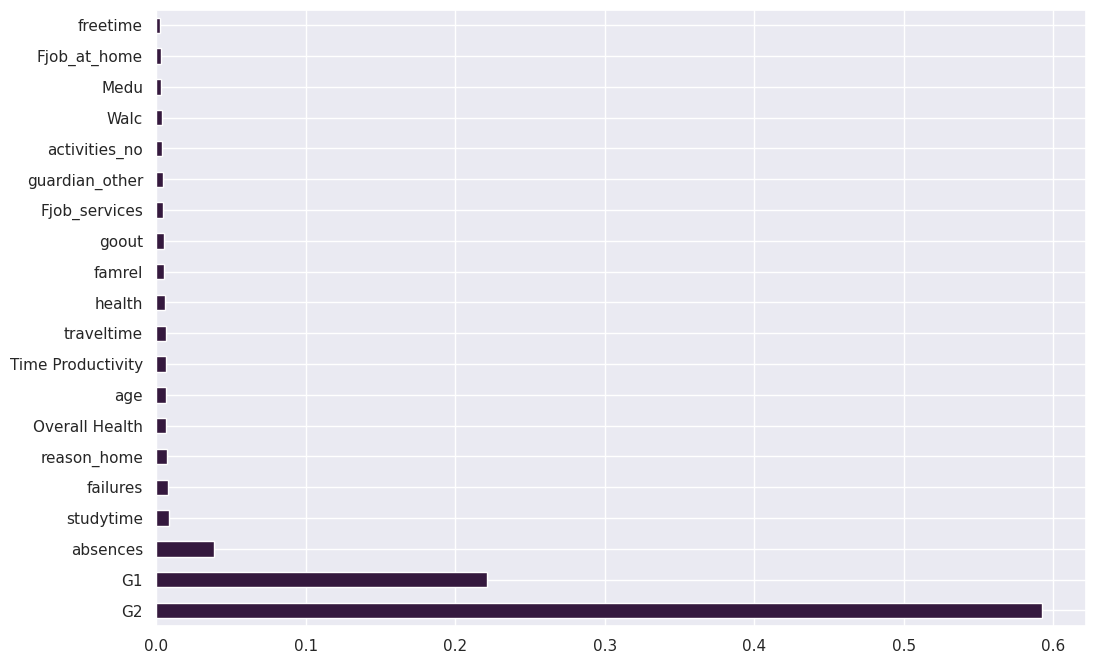

In [94]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [95]:
X = df[['absences', 'G1', 'G2']]
y = df[['G3']]

In [96]:
from sklearn.linear_model import LinearRegression

# linear regression
lin_reg = LinearRegression(normalize=True)

# Fitting Simple Linear Regression ke training set
lin_reg.fit(X_train,y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [97]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1.5281829319564988
MSE: 5.035848550843891
RMSE: 2.244069640373019
R2 Square 0.7709110170372763
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.1503169458547864
MSE: 2.7216544728392518
RMSE: 1.6497437597515718
R2 Square 0.8671066743053562
__________________________________


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5a070a30-ea6c-4a9b-860d-602a64b5416e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>